<a href="https://colab.research.google.com/github/kiet0807/CS114.L21/blob/main/NN_Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten

import pandas as pd

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Kích thước bộ dataset
# Hình ảnh có kích thước 28x28

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [4]:
# Số lượng ảnh train và ảnh test

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


y = 2
label: Pullover


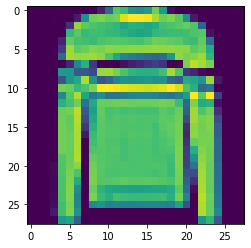

In [5]:
# Xác định label để vẽ biểu đồ

fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index = 5

label_index = y_train[img_index]

print ("y = " + str(label_index))

print ("label: " + (fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

In [50]:
model = tf.keras.Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
%time history = model.fit(x_train, y_train, epochs=100, batch_size=1000, validation_split=0.2, verbose=1)

Epoch 1/100
48/48 [==============================] - 1s 18ms/step - loss: 28.0499 - accuracy: 0.6367 - val_loss: 8.9804 - val_accuracy: 0.7316
Epoch 2/100
48/48 [==============================] - 1s 15ms/step - loss: 6.7075 - accuracy: 0.7580 - val_loss: 5.9067 - val_accuracy: 0.7664
Epoch 3/100
48/48 [==============================] - 1s 15ms/step - loss: 4.7290 - accuracy: 0.7820 - val_loss: 4.2977 - val_accuracy: 0.7826
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 3.6613 - accuracy: 0.7932 - val_loss: 3.5181 - val_accuracy: 0.7883
Epoch 5/100
48/48 [==============================] - 1s 15ms/step - loss: 2.9393 - accuracy: 0.7996 - val_loss: 2.9495 - val_accuracy: 0.7881
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 2.4150 - accuracy: 0.8033 - val_loss: 2.5442 - val_accuracy: 0.7847
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 2.0561 - accuracy: 0.8055 - val_loss: 2.2662 - val_accuracy: 0.7891
Epoch

In [55]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=1000)
print("Train Accuracy: " ,train_accuracy)
print("Train Loss: " ,train_loss)

60/60 [==============================] - 0s 7ms/step - loss: 0.3024 - accuracy: 0.9069
Train Accuracy:  0.9069499969482422
Train Loss:  0.30244776606559753


In [56]:
test_loss, test_acc = model.evaluate(x_test,  y_test, batch_size = 1000)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10/10 [==============================] - 0s 8ms/step - loss: 0.7249 - accuracy: 0.8537

Test accuracy: 0.8536999821662903

Test loss: 0.7248932719230652


In [57]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [58]:
predictions = probability_model.predict(x_test)

In [59]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 4.1713333e-37, 0.0000000e+00,
       0.0000000e+00, 2.0509654e-19, 0.0000000e+00, 3.2973083e-05,
       9.5898046e-32, 9.9996698e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])


9

In [61]:
y_test[0]

9

In [62]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(np.squeeze(img))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predicted_label],
                                100*np.max(predictions_array),
                                fashion_mnist_labels[true_label]),
                                color=color)

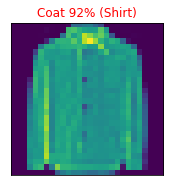

In [63]:
i = 2540
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.show()

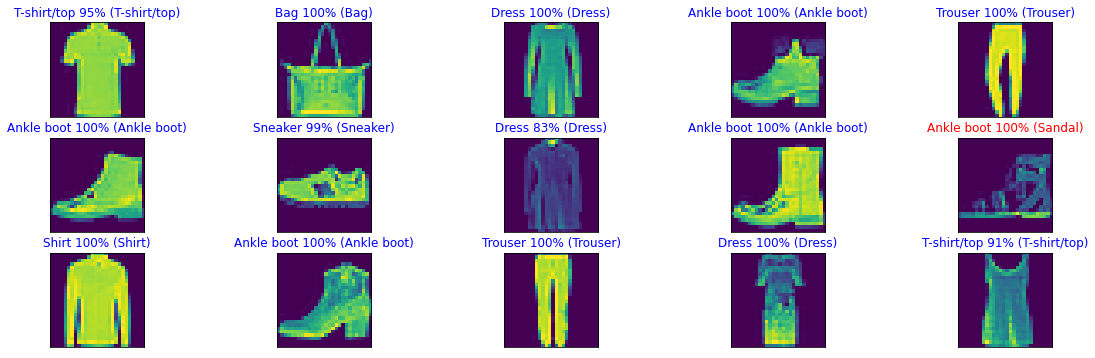

In [64]:
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(index, predictions[index], y_test, x_test)
plt.show()

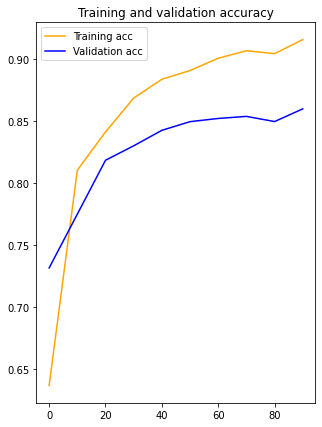

In [68]:
# Biểu đồ train accuracy và val_accuracy

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(acc, 'b', label='Training acc', color = 'orange')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

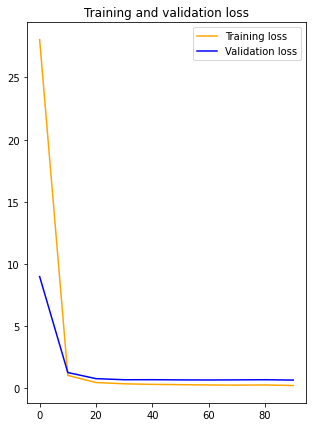

In [67]:
# Biểu đồ train loss và val_loss

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss).iloc[::every_sample, :]
    val_loss = pd.DataFrame(val_loss).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(loss, 'b', label='Training loss', color = 'orange')
    ax.plot(val_loss, 'b', label='Validation loss')
    ax.set_title('Training and validation loss')
    ax.legend()

plot_history(history)